In [9]:
#EXAMPLE - CALIFORNIA HOUSING
#import the dataset as a dataFrame
from sklearn.datasets import fetch_california_housing
california_housing=fetch_california_housing(as_frame=True)
df=california_housing.frame
import pandas as pd
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
#a) KNN REGRESSION IMPLEMENTATION
#PREPROCESSING DATA FOR KNN REGRESSION
y=df['MedHouseVal']
x=df.drop(['MedHouseVal'], axis=1)
x.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [38]:
#split the data
from sklearn.model_selection import train_test_split
seed=42
train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=0.25, random_state=seed)
len(x)       # 20640
len(train_x) # 15480
len(test_x)  # 5160
#print(train_x)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_x)
train_x=scaler.transform(train_x)
test_x=scaler.transform(test_x)
#print(train_x)

#thr scaler only contains data point. Lets organize a data frame with the column names:
col_names=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
scaled_df=pd.DataFrame(train_x, columns=col_names)
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,15480.0,2.172968e-16,1.000032,-1.774632,-0.688854,-0.175663,0.464450,5.842113
HouseAge,15480.0,-1.254954e-16,1.000032,-2.188261,-0.840224,0.032036,0.666407,1.855852
AveRooms,15480.0,-1.148163e-16,1.000032,-1.877586,-0.407008,-0.083940,0.257082,56.357392
AveBedrms,15480.0,1.239408e-16,1.000032,-1.740123,-0.205765,-0.108332,0.007435,55.925392
Population,15480.0,-7.874838e-17,1.000032,-1.246395,-0.558886,-0.227928,0.262056,29.971725
AveOccup,15480.0,2.672550e-17,1.000032,-0.201946,-0.056581,-0.024172,0.014501,103.737365
Latitude,15480.0,8.022581e-16,1.000032,-1.451215,-0.799820,-0.645172,0.971601,2.953905
Longitude,15480.0,2.169625e-15,1.000032,-2.380303,-1.106817,0.536231,0.785934,2.633738


In [45]:
#training and predicting KNN
from sklearn.neighbors import KNeighborsRegressor
#assign 5 neighbors to start (randomly)
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(train_x, train_y)

#make predictions
y_pred=regressor.predict(test_x)

#evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae=mean_absolute_error(test_y, y_pred)
mse=mean_squared_error(test_y, y_pred)
rmse=mean_squared_error(test_y, y_pred, squared=False)
print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')
#calculate scores
print('Regressor score:', regressor.score(test_x, test_y))

mae: 0.4460739527131783
mse: 0.4316907430948294
rmse: 0.6570317671884894
Regressor score: 0.6737569252627673


In [47]:
#Finding the optimal K value for KNN
error=[]
for i in range(1,40):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i=knn.predict(test_x)
    mae=mean_absolute_error(test_y, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

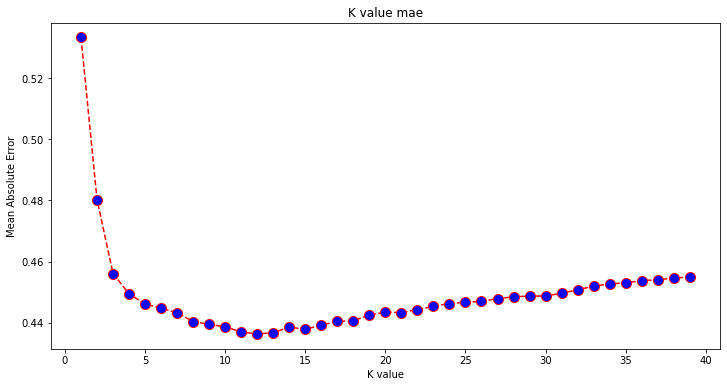

In [48]:
#plotting the error.
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('K value mae')
plt.xlabel('K value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

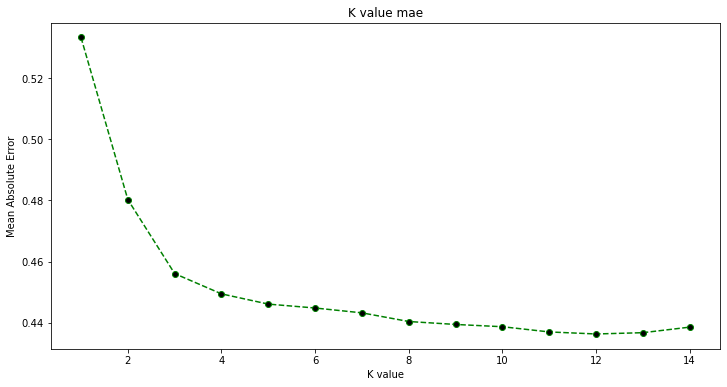

In [55]:
#optimal k value is not feasible on the graph. so we narrow the ranges and take a closer look at it.
plt.figure(figsize=(12,6))
plt.plot(range(1,15), error[:14], color='green', linestyle='dashed', marker='o', 
         markerfacecolor='black', markersize=6)
plt.title('K value mae')
plt.xlabel('K value')
plt.ylabel('Mean Absolute Error')

In [59]:
#so we understand that the optimal value of k is 12
import numpy as np
print('the lowest mae:',min(error))
print('the lowest mae (k-1)-value:', np.array(error).argmin())
print('so the number of neighbors is:', np.array(error).argmin()+1)
#we receive that the number of neighbors needed to be able to predict a point with a lowest mae is 12 (0,1,2...,11)

the lowest mae: 0.43631325936692505
the lowest mae (k-1)-value: 11
so the number of neighbors is: 12


In [67]:
#prediction with k=12
knn_reg12=KNeighborsRegressor(n_neighbors=12)
knn_reg12.fit(train_x, train_y)
y_pred12=knn_reg12.predict(test_x)
r2=knn_reg12.score(test_x, test_y)
mae12=mean_absolute_error(test_y, y_pred12)
sme12=mean_squared_error(test_y, y_pred12)
rmse12=mean_squared_error(test_y, y_pred12, squared=False)

print(f'r2: {r2} \n mae: {mae12} \n sme: {sme12} \n rmse: {rmse12}' )
#mae12=mean_absolute_error(ytest_y, pred)

r2: 0.6887495617137436 
 mae: 0.43631325936692505 
 sme: 0.4118522151025172 
 rmse: 0.6417571309323467


In [76]:
#KNN CLASSIFICATION
#preprocess the data for classification
#creating databins to transform our continuous values into categories. 
#creating 4 categories and assigning them into MedHouseValCat column.
df['MedHouseValCat']=pd.qcut(df['MedHouseVal'], 4, retbins=False, labels=[1,2,3,4])

#split the dataset into attributes and labels.
y=df['MedHouseValCat']
x=df.drop(['MedHouseVal', 'MedHouseValCat'], axis=1)

#splitting the data into training and test subsets
from sklearn.model_selection import train_test_split
seed=42
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=seed)

#feature scaling for classification
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#training and predicting
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train, y_train)
y_pred2=classifier.predict(x_test)

#evaluation
accuracy_classifier=classifier.score(x_test, y_test)
print('the accuracy of the model is:',accuracy_classifier)

the accuracy of the model is: 0.6191860465116279


              precision    recall  f1-score   support

           1       0.75      0.78      0.76      1292
           2       0.49      0.56      0.53      1283
           3       0.51      0.51      0.51      1292
           4       0.76      0.62      0.69      1293

    accuracy                           0.62      5160
   macro avg       0.63      0.62      0.62      5160
weighted avg       0.63      0.62      0.62      5160



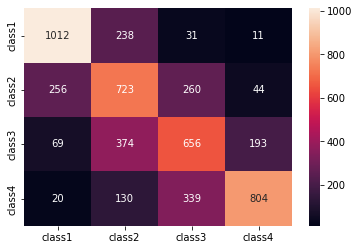

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
class_names=['class1', 'class2', 'class3', 'class4']
cm=pd.DataFrame(confusion_matrix(y_test, y_pred2), columns=class_names, index=class_names)

#plotting it
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_pred2))

Text(0, 0.5, 'f1 score')

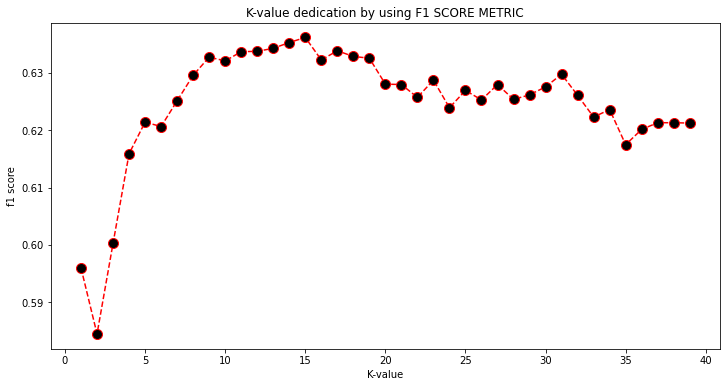

In [84]:
#finding the optimal number of k for classification
#the best metric to find it to use f1_score
from sklearn.metrics import f1_score
f1s=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i=knn.predict(x_test)
    f1s.append(f1_score(y_test, pred_i, average='weighted')) #to calculate weighted average for 4 classes.
    
#THE DIFFERENCE FROM REGRESSION IS THAT INSTEAD OF SEEKING FOR THE MIN VALUE OF MAE, WE CHECK AND GRAB 
#THE MAX VALUE OF MAE.

plt.figure(figsize=(12,6))
plt.plot(range(1,40), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('K-value dedication by using F1 SCORE METRIC')
plt.xlabel('K-value')
plt.ylabel('f1 score')

In [86]:
#we can see that the optimal k value is 15 from the table above.
#classification with k=15
classifier15=KNeighborsClassifier()
classifier15.fit(x_train,y_train)
y_pred15=classifier15.predict(x_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           1       0.75      0.78      0.76      1292
           2       0.49      0.56      0.53      1283
           3       0.51      0.51      0.51      1292
           4       0.76      0.62      0.69      1293

    accuracy                           0.62      5160
   macro avg       0.63      0.62      0.62      5160
weighted avg       0.63      0.62      0.62      5160



In [88]:
#IMPLEMENTING KNN FOR OUTLIER DETECTION
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5)
nbrs.fit(X_train)
# Distances and indexes of the 5 neighbors 
distances, indexes = nbrs.kneighbors(X_train)
distances[:3], distances.shape

(array([[0.        , 0.12998939, 0.15157687, 0.16543705, 0.17750354],
        [0.        , 0.25535314, 0.37100754, 0.39090243, 0.40619693],
        [0.        , 0.27149697, 0.28024623, 0.28112326, 0.30420656]]),
 (15480, 5))

In [89]:
indexes[:3], indexes[:3].shape

(array([[    0,  8608, 12831,  8298,  2482],
        [    1,  4966,  5786,  8568,  6759],
        [    2, 13326, 13936,  3618,  9756]]),
 (3, 5))

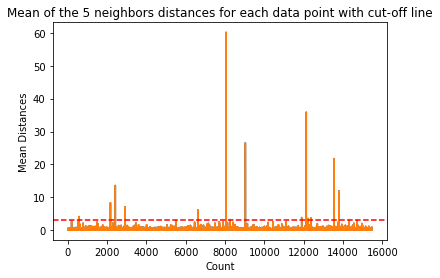

In [91]:
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
dist_means = distances.mean(axis=1)
plt.plot(dist_means)
plt.title('Mean of the 5 neighbors distances for each data point with cut-off line')
plt.xlabel('Count')
plt.ylabel('Mean Distances')
plt.axhline(y = 3, color = 'r', linestyle = '--')


In [92]:
import numpy as np

# Visually determine cutoff values > 3
outlier_index = np.where(dist_means > 3)
outlier_index
outlier_values = df.iloc[outlier_index]
outlier_values

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseValCat
564,4.8711,27.0,5.082811,0.944793,1499.0,1.880803,37.75,-122.24,2.86600,4
2167,2.8359,30.0,4.948357,1.001565,1660.0,2.597809,36.78,-119.83,0.80300,1
2415,2.8250,32.0,4.784232,0.979253,761.0,3.157676,36.59,-119.44,0.67600,1
2902,1.1875,48.0,5.492063,1.460317,129.0,2.047619,35.38,-119.02,0.63800,1
6607,3.5164,47.0,5.970639,1.074266,1700.0,2.936097,34.18,-118.14,2.26500,3
8047,2.7260,29.0,3.707547,1.078616,2515.0,1.977201,33.84,-118.17,2.08700,3
8243,2.0769,17.0,3.941667,1.211111,1300.0,3.611111,33.78,-118.18,1.00000,1
9029,6.8300,28.0,6.748744,1.080402,487.0,2.447236,34.05,-118.78,5.00001,4
11892,2.6071,45.0,4.225806,0.903226,89.0,2.870968,33.99,-117.35,1.12500,1
12127,4.1482,7.0,5.674957,1.106998,5595.0,3.235975,33.92,-117.25,1.24600,2
